In [1]:
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os

gfz = Client('GFZ')
gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
starttime = UTCDateTime(2015,8,1)
endtime = UTCDateTime(2015,8,5)
sc.download_waveforms_mdl(starttime,endtime,clients=[gfz], network='D0', station='*')

FDSNException: Bad request. If you think your request was valid please contact the developers.
Detailed response of server:

Error 400: Bad Request
token is expired
Usage details are available from /fdsnws/dataselect/1/
Request:
/fdsnws/dataselect/1/auth
Request Submitted:
2021-05-11T13:07:35.37769
Service Version:
1.1.0

In [1]:
# Try to read in the files written in the section above
sc.read_only=True
st = sc.get_waveforms('D0', 'BDR', '*', '*', UTCDateTime(0), UTCDateTime(2100,1,1),_check_times=False)
print(st)

NameError: name 'sc' is not defined

In [1]:
from miic3.trace_data.preprocess import Preprocessor
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os
import time

gfz = Client('GFZ')
#gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
c = Preprocessor(sc, sampling_rate=25, outfolder='testnb_preprocessed_dailypp_lowwl', remove_response=True)


In [2]:
import time
import os
#c.preprocess_bulk(network='D0', backend='joblib', n_cpus=8)
c.preprocess_bulk(network='D0', statlist=['BZG', 'ESO', 'KBG','KIR'], backend='joblib', n_cpus=8)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:   23.7s
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:   24.8s remaining:   24.8s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:   27.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:   27.8s finished


In [4]:
import scipy.io
import os
import numpy as np
fname = "/home/pm/Documents/PhD/testdata/miic_old/corr/2015/213/20150801T0{n}0001000000Z_trace_D0D0.BZGESO.0000.HHZHHZ.mat"
A = np.zeros((10,5001))
for n in range(0,10):
    mat = scipy.io.loadmat(fname.format(n=n))
    A[n,:] = mat['corr_trace'][:,0]

(5001, 1)
         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-01T01:00:01.000000Z
         endtime: 2015-08-01T01:03:21.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-01T02:00:00.960000Z
      corr_start: 2015-08-01T01:00:01.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 23, 59, 59)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', "ObsPy 1.2.2: filter(options={'freqmin': 0.01, 'freqmax': 9}::type='bandpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 2, 0, 0, 960000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateT

Text(0.5, 1.0, 'difference IR vs no IR (24h stack)')

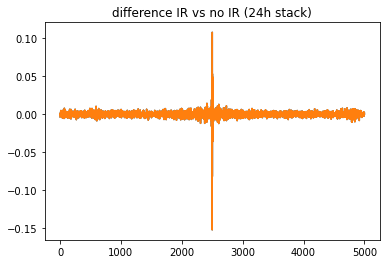

In [6]:

import matplotlib.pyplot as plt
import numpy as np
print(mat['corr_trace'].shape)
#plt.plot(np.sum(mat['corr_data'],axis=0))
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp_wir/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='subdivision')
import matplotlib.pyplot as plt
#print(cst[1].stats)
l = []
for tr in cst:
    l.append(tr.data)
noIR_mean = np.sum(l, axis=0)
print(cst[1].stats)
plt.plot(cst[0].data)
plt.plot(A[0,])
#plt.plot(cst[1].data-A[1,])
#plt.plot(noIR_mean)
#plt.plot(A.sum(axis=0))
#plt.plot((A.sum(axis=0)-noIR_mean))
plt.title('difference IR vs no IR (24h stack)')
#plt.title('Daily Stacks')
#plt.legend(['With IR (old miic)', 'IR removed (new miic)'])
#cst[2].plot()


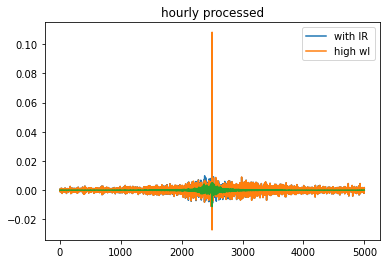

In [7]:

import matplotlib.pyplot as plt
import numpy as np
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='recombined')
# Same data but with IR
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp_lowwl/D0-D0.BZG-ESO.h5') as cdb:
    cstwir = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
#print(cst[1].stats)
l = []
for tr in cst:
    l.append(tr.data)
noIR_mean = np.sum(l, axis=0)
#print(cst[1].stats)
plt.plot(cstwir[1].data)
plt.plot(cst[1].data)
plt.plot(cstwir[1].data-cst[1].data)
#plt.plot(noIR_mean)
#plt.plot(A.sum(axis=0))
#plt.plot((A.sum(axis=0)-noIR_mean))
#plt.title('difference IR vs no IR (24h stack)')
plt.title('hourly processed')
plt.legend(['with IR','high wl'])
#cst[2].plot()


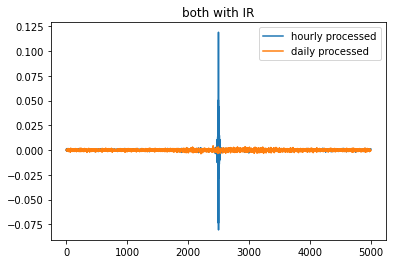

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_wir/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='recombined')
# Same data but with IR
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp_wir/D0-D0.BZG-ESO.h5') as cdb:
    cstwir = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
#print(cst[1].stats)
l = []
for tr in cst:
    l.append(tr.data)
noIR_mean = np.sum(l, axis=0)
plt.plot(cst[1].data)
plt.plot(cstwir[1].data)

#plt.plot(cst[1].data-A[1,])
#plt.plot(noIR_mean)
#plt.plot(A.sum(axis=0))
#plt.plot((A.sum(axis=0)-noIR_mean))
plt.title('both with IR')
#plt.title('Daily Stacks')
plt.legend(['hourly processed','daily processed'])
#cst[2].plot()

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='recombined')
# Same data but with IR
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp_wir/D0-D0.BZG-ESO.h5') as cdb:
    cstwir = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
print(cst[4].stats)
l = []
for tr in cst:
    l.append(tr.data)
noIR_mean = np.sum(l, axis=0)
plt.plot(cst[4].data)
plt.plot(cstwir[4].data)
#plt.plot(cst[1].data-cstwir[1].data)

#plt.plot(cst[1].data-A[1,])
#plt.plot(noIR_mean)
#plt.plot(A.sum(axis=0))
#plt.plot((A.sum(axis=0)-noIR_mean))
plt.title('daily processed')
#plt.title('Daily Stacks')
plt.legend(['Instrument Response Removed','with IR', 'difference'])
#cst[2].plot()

         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-04T01:00:01.000000Z
         endtime: 2015-08-04T01:03:21.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-04T23:59:33.240000Z
      corr_start: 2015-08-04T01:00:01.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 4, 23, 59, 59)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 4, 0, 0, 1))', "ObsPy 1.2.2: filter(options={'freqmin': 0.5, 'freqmax': 1}::type='bandpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 4, 2, 0, 0, 960000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8

IndexError: list index out of range

In [5]:
from pyasdf import ASDFDataSet
from obspy import read
st = read()
with ASDFDataSet('/home/pm/Desktop/test', mode="a", mpi=False) as ds:
    ds.add_waveforms(st, tag='raw')
    inv = ds.waveforms[
        '%s.%s' % (st[0].stats.network, st[0].stats.station)].StationXML

/home/pm/.local/lib/python3.8/site-packages/pyasdf/asdf_data_set.py:1552: ASDFWarning: Data 'BW.RJOB/BW.RJOB..EHZ__2009-08-24T00:20:03__2009-08-24T00:20:32__raw' already exists in file. Will not be added!
  warnings.warn(msg, ASDFWarning)
/home/pm/.local/lib/python3.8/site-packages/pyasdf/asdf_data_set.py:1552: ASDFWarning: Data 'BW.RJOB/BW.RJOB..EHN__2009-08-24T00:20:03__2009-08-24T00:20:32__raw' already exists in file. Will not be added!
  warnings.warn(msg, ASDFWarning)
/home/pm/.local/lib/python3.8/site-packages/pyasdf/asdf_data_set.py:1552: ASDFWarning: Data 'BW.RJOB/BW.RJOB..EHE__2009-08-24T00:20:03__2009-08-24T00:20:32__raw' already exists in file. Will not be added!
  warnings.warn(msg, ASDFWarning)


AttributeError: 'WaveformAccessor' object has no attribute 'StationXML'

In [10]:
import glob
glob.glob('/home/pm/Desktop/*')

['/home/pm/Desktop/receipt_EGU21-RGV-2021-1929.pdf',
 '/home/pm/Desktop/185188760_4167226750003249_8010148373859273001_n.jpg',
 '/home/pm/Desktop/Untitled Document 2',
 '/home/pm/Desktop/Kalkulationsblatt.pdf',
 '/home/pm/Desktop/test',
 '/home/pm/Desktop/Fwd: Din kvittering fra Kitch’n #204705#.eml',
 '/home/pm/Desktop/Untitled 1.pdf',
 '/home/pm/Desktop/Antrag_Drittmittel.pdf',
 '/home/pm/Desktop/IMG_20210321_200018.jpg',
 '/home/pm/Desktop/185310072_323895075772287_2223697833473229252_n.jpg',
 '/home/pm/Desktop/188816043_1373120959713657_4021508787776883620_n.jpg',
 '/home/pm/Desktop/rechnung_200600.pdf',
 '/home/pm/Desktop/mendeleydesktop.desktop',
 '/home/pm/Desktop/Untitled Document',
 '/home/pm/Desktop/Masters-confirmation Peter Makus.pdf',
 '/home/pm/Desktop/bill__a7r3.pdf']

In [14]:
net = ['TOTAL']*3 + ['RANDOM']*3
stat = ['RANDOM', 'BUT', 'SA', 'ME', 'LEN', 'GTH']
res = [a+'.'+b for a, b in zip(net, stat)]
print(res)

['TOTAL.RANDOM', 'TOTAL.BUT', 'TOTAL.SA', 'RANDOM.ME', 'RANDOM.LEN', 'RANDOM.GTH']


In [68]:
from miic3.trace_data.waveform import Store_Client
sc = Store_Client('test', '/home/pm/Documents/PhD/testdata', read_only=True)
sc._get_times('D0','BDR')

(2015-08-01T00:00:00.000000Z, 2015-08-05T00:00:00.000000Z)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


True

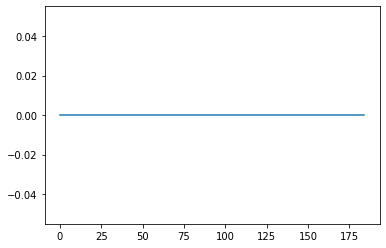

In [25]:
import numpy as np
from miic3.correlate import correlate
np.random.seed(2)
dim = (np.random.randint(200,766), np.random.randint(2,44))
A = np.random.random(dim)-.5
Aft = np.fft.rfft(A, axis=0)
A = np.sign(A)
expected_result = np.fft.rfft(A, axis=0)
#expected_result = A
real_res = correlate.FDsignBitNormalization(Aft, {}, {})
from matplotlib import pyplot as plt
plt.plot(real_res[:,0]-expected_result[:,0])
#plt.plot(expected_result[:,0])
np.allclose(
            expected_result, real_res)

In [28]:
from scipy.signal.windows import gaussian
A = np.tile(gaussian(150, std=7), (2, 1)).T
print(A.shape)

(150, 2)


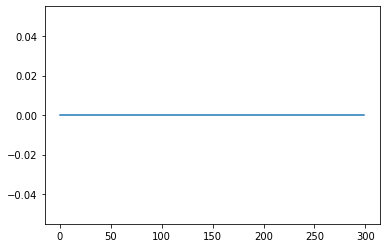

In [203]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal.windows import gaussian, boxcar
params = {}
params['sampling_rate'] = 25
# testing the actual muting of the bit
args = {}
args['taper_len'] = 2
args['extend_gaps'] = True
args['threshold'] = .05
#npts = np.random.randint(800, 1200)
npts = 300
from copy import deepcopy
A = np.tile(gaussian(npts, 60), (2, 1)).T
res = correlate.mute(A, args, params)
plt.plot(A[:,0])
#plt.plot(res[:,0])

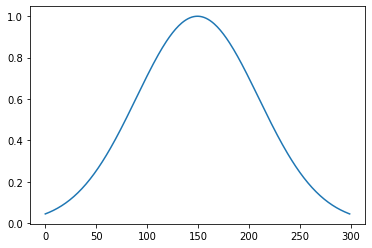

In [183]:
plt.plot(gaussian(300, 60))